In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean
import mixsea as mx
import scipy.stats as ss
from pandas import DataFrame
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)
import src.read_CTDs

In [2]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "savefig.facecolor": "white",
    "font.size": 9
})

ONE_COLUMN_WIDTH = 8.3
TWO_COLUMN_WIDTH = 12
GOLDEN_RATIO = 1.61
cm = 1 / 2.54  # centimeters in inches



In [3]:
#from src.read_CTDs import load_Joinville_transect_CTDs
CTDs = src.read_CTDs.load_Joinville_transect_CTDs()
#CTDs_grouped = CTDs.groupby("Event")

loading of ../../data/CTD/joinville_transect_ctds_incl_neutral_density.csv was successful
renaming of matlab style columns
Var1 	 index
Event 	 Event
Latitude 	 Latitude
Longitude 	 Longitude
Press_dbar_ 	 Press [dbar]
Sal 	 Sal
Temp__C_ 	 Temp [°C]
AbsoluteSalinity 	 Absolute Salinity
ConservativeTemperature 	 Conservative Temperature
Date_Time 	 Date/Time
DepthWater_m_ 	 Depth water [m]
Expedition 	 Expedition
neutral_density 	 Neutral density [kg m^-3]


In [4]:
CTDs = CTDs[CTDs["Expedition"]=="PS129"]

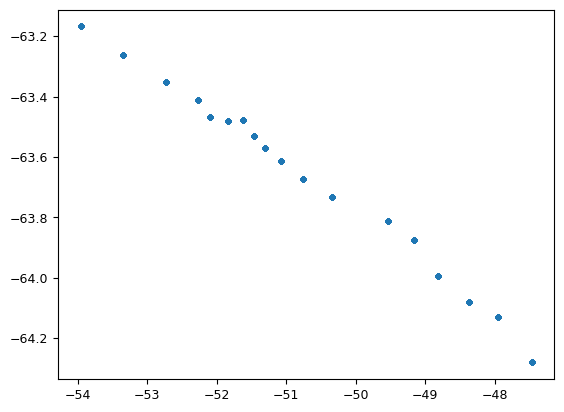

In [5]:
plt.plot(CTDs["Longitude"],CTDs["Latitude"],".")

In [6]:
CTDs["Depth water [m]"] = CTDs["Depth water [m]"].round(0).astype(int)
transect = CTDs.pivot_table(index="Depth water [m]", columns = "Longitude", values = "Neutral density [kg m^-3]")
transect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4149 entries, 1 to 4149
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   -53.955  227 non-null    float64
 1   -53.35   382 non-null    float64
 2   -52.728  441 non-null    float64
 3   -52.272  665 non-null    float64
 4   -52.095  911 non-null    float64
 5   -51.838  1195 non-null   float64
 6   -51.614  1793 non-null   float64
 7   -51.456  1963 non-null   float64
 8   -51.301  2174 non-null   float64
 9   -51.074  2327 non-null   float64
 10  -50.754  2520 non-null   float64
 11  -50.346  2634 non-null   float64
 12  -49.539  3146 non-null   float64
 13  -49.163  3390 non-null   float64
 14  -48.817  3654 non-null   float64
 15  -48.364  3874 non-null   float64
 16  -47.953  4047 non-null   float64
 17  -47.467  4148 non-null   float64
dtypes: float64(18)
memory usage: 615.9 KB


In [7]:
lons = transect.columns.to_numpy()
depths = [col.last_valid_index()-1 for lon, col in transect.items()]
bathymetry = pd.Series(index=lons, data = depths)

max_density_lons = []
max_density = []
for lon, col in transect.items():
    last_index = int(col.last_valid_index())-1
    if last_index is not None:
        max_density.append(col.iloc[last_index])
        max_density_lons.append(lon)
max_density = pd.Series(index=max_density_lons, data = max_density)

new_lons = np.linspace(min(lons),max(lons),100)
new_lons = np.unique(np.sort(np.append(new_lons,lons)))
#new_lons
bathymetry = bathymetry.reindex(index = new_lons, method=None)
bathymetry = bathymetry.interpolate(method="cubic").round(0).astype(int)
densities = max_density.reindex(index = new_lons, method=None)
densities = densities.interpolate(method="linear")

In [8]:
bathymetry

-53.955000     228
-53.889465     252
-53.823929     274
-53.758394     294
-53.692859     312
              ... 
-47.729141    4116
-47.663606    4130
-47.598071    4140
-47.532535    4146
-47.467000    4148
Length: 116, dtype: int64

In [9]:
print(bathymetry.size, densities.size)

116 116


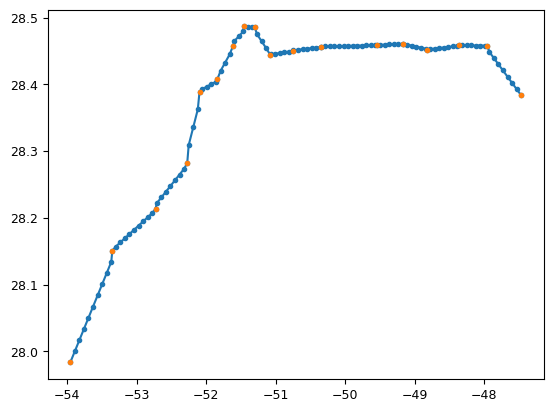

In [10]:
plt.plot(densities.index, densities.values, "-", marker = ".")
plt.plot(max_density.index, max_density.values, ".")

/tmp/ipykernel_5504/1149046332.py:1: UserWarning: The following kwargs were not used by contour: 'shading'
  mpp = plt.contourf(


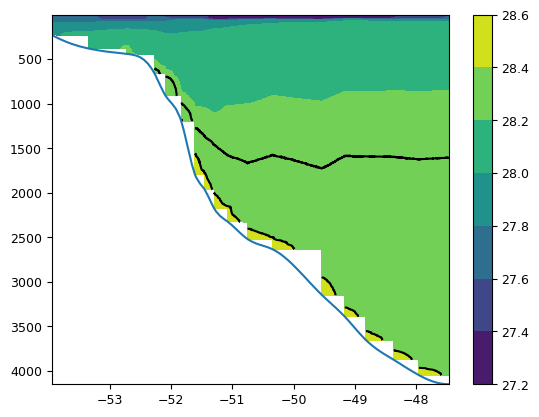

In [11]:
mpp = plt.contourf(
    transect.columns,
    transect.index,
    transect.values,
    shading = "gouroud"
)
plt.contour(
    transect.columns,
    transect.index,
    transect.values,
    levels=[28.26, 28.40],
    colors="k"
)
plt.gca().invert_yaxis()  
plt.colorbar(mpp)
plt.plot(bathymetry.index, bathymetry.values)

In [12]:
transect = transect.reindex(columns=bathymetry.index, method=None)

In [13]:
for (lon, col), (_lon, depth), (_lon2, density) in zip(transect.items(), bathymetry.items(), densities.items(), strict=True):
    assert lon == _lon
    assert lon == _lon2
    #if np.isnan(col.iloc[depth]):
    col.iloc[depth] = density
    #print(f"{lon:.1f}, {depth:.1f}, {density:.2f}")    

In [14]:
transect

,-53.955000,-53.889465,-53.823929,-53.758394,-53.692859,-53.627323,-53.561788,-53.496253,-53.430717,-53.365182,...,-47.991283,-47.953000,-47.925747,-47.860212,-47.794677,-47.729141,-47.663606,-47.598071,-47.532535,-47.467000
Depth water [m],,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.490034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.486796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.607695
3,27.640333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.485794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.607518
4,27.640858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.486374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.608094
5,27.640529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.488063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.608210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.383356
4146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.383552
4147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.392849,28.383647


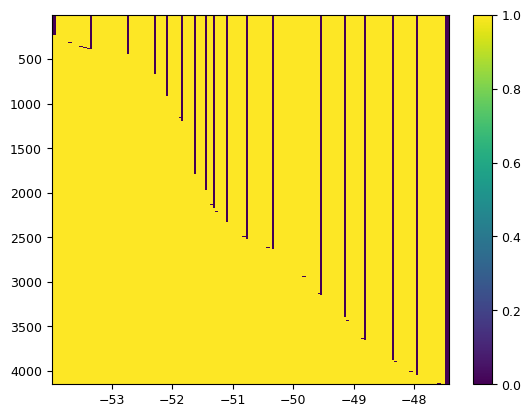

In [15]:
mpp = plt.pcolormesh(
    transect.columns,
    transect.index,
    np.isnan(transect.values),
    shading = "nearest"
)
# plt.contour(
#     transect.columns,
#     transect.index,
#     transect.values,
#     levels=[28.26, 28.40],
#     colors="k"
# )
plt.gca().invert_yaxis()  
plt.colorbar(mpp)
#plt.plot(bathymetry.index, bathymetry.values)

In [16]:

from scipy.interpolate import griddata

# Assume df has depth as index and longitude as columns
depths = transect.index.values
longitudes = transect.columns.astype(float)  # Ensure longitude is numeric
density_values = transect.values  # 2D array of density

# Create a finer grid
#fine_longitudes = np.linspace(longitudes.min(), longitudes.max(), num=100)  # More points in longitude

# Create grid points
grid_x, grid_y = np.meshgrid(longitudes, depths)

# Flatten input data for griddata
points = np.array([(lon, dep) for dep in depths for lon in longitudes])
values = density_values.flatten()
values2 = values[~np.isnan(values)]
points2 = points[~np.isnan(values)]

# Interpolate onto the fine grid
fine_density = griddata(points2, values2, (grid_x, grid_y), method='linear')

# Convert back to DataFrame
fine_df = pd.DataFrame(fine_density, index=depths, columns=longitudes)

In [17]:
fine_df 

,-53.955000,-53.889465,-53.823929,-53.758394,-53.692859,-53.627323,-53.561788,-53.496253,-53.430717,-53.365182,...,-47.991283,-47.953000,-47.925747,-47.860212,-47.794677,-47.729141,-47.663606,-47.598071,-47.532535,-47.467000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.478372,27.490034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,27.630550,27.628590,27.626629,27.624669,27.622708,...,27.473992,27.486796,27.493575,27.509878,27.526181,27.542484,27.558786,27.575089,27.591392,27.607695
3,27.640333,27.638395,27.636456,27.634518,27.632580,27.630641,27.628703,27.626765,27.624826,27.622888,...,27.473094,27.485794,27.492620,27.509034,27.525448,27.541862,27.558276,27.574690,27.591104,27.607518
4,27.640858,27.638889,27.636919,27.634949,27.632979,27.631010,27.629040,27.627070,27.625100,27.623131,...,27.473628,27.486374,27.493199,27.509613,27.526026,27.542440,27.558853,27.575267,27.591680,27.608094
5,27.640529,27.638622,27.636715,27.634807,27.632900,27.630993,27.629086,27.627179,27.625272,27.623365,...,27.475151,27.488063,27.494800,27.511002,27.527203,27.543404,27.559606,27.575807,27.592008,27.608210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.392796,28.383356
4146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.392823,28.383552
4147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.392849,28.383647
4148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.383671


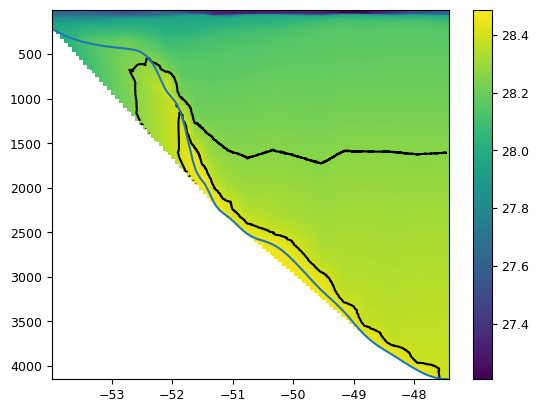

In [18]:
mpp = plt.pcolormesh(
    fine_df.columns,
    fine_df.index,
    fine_df.values,
    shading = "nearest"
)
plt.contour(
    fine_df.columns,
    fine_df.index,
    fine_df.values,
    levels=[28.26, 28.40],
    colors="k"
)
plt.gca().invert_yaxis()  
plt.colorbar(mpp)
plt.plot(bathymetry.index, bathymetry.values)

In [19]:
final = fine_df.copy(deep=True)
for (lon, col), (_lon, depth), (_lon2, density) in zip(fine_df.items(), bathymetry.items(), densities.items(), strict=True):
    assert lon == _lon
    assert lon == _lon2
    final.loc[depth:, lon] = np.nan
    #print(f"{lon:.1f}, {depth:.1f}, {density:.2f}")    

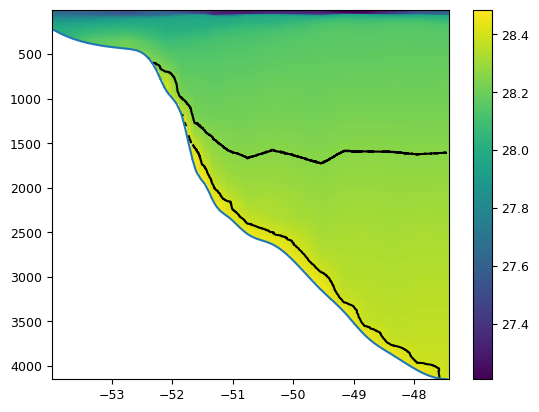

In [20]:
mpp = plt.pcolormesh(
    final.columns,
    final.index,
    final.values,
    shading = "nearest"
)
plt.contour(
    final.columns,
    final.index,
    final.values,
    levels=[28.26, 28.40],
    colors="k"
)
plt.gca().invert_yaxis()  
plt.colorbar(mpp)
plt.plot(bathymetry.index, bathymetry.values)

In [22]:
wave_energy_dissipation = pd.read_csv("../../derived_data/wave_energy_dissipation.csv", index_col = 0)
wave_energy_dissipation;

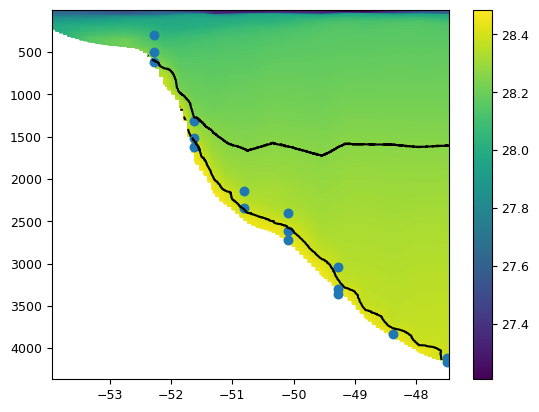

In [23]:
mpp = plt.pcolormesh(
    final.columns,
    final.index,
    final.values,
    shading = "gouraud"
)
plt.contour(
    final.columns,
    final.index,
    final.values,
    levels=[28.26, 28.40],
    colors="k"
)
plt.gca().invert_yaxis()  
plt.colorbar(mpp)
#plt.plot(bathymetry.index, bathymetry.values)
plt.scatter(wave_energy_dissipation["lon"], wave_energy_dissipation["rounded depth"], marker = ".", s = 150)

In [25]:
final.to_csv("./method_results/PS129_transect.csv")